<a href="https://colab.research.google.com/github/fmezacr/Circuitos-CC-CA/blob/main/Delta_Estrella.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

<div style="font-size:small;">

MIT License

Copyright (c) [2024] Felipe Meza-Obando

*Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software for educational purposes only. You must give author appropriate credit, provide a link to the license and source, and indicate if changes were made.*
</div>

---


## **Transformaciones Delta-Estrella y Estrella-Delta**
### Autor: ***Felipe Meza-Obando***


## **1. Introducción**

Las redes de resistencias pueden representarse en dos configuraciones fundamentales:

- **Configuración Delta (Δ)**: Tres resistencias conectadas en forma de triángulo.
- **Configuración Estrella (Y)**: Tres resistencias conectadas con un nodo común.

Las transformaciones entre estas configuraciones son esenciales en análisis de circuitos eléctricos, especialmente cuando se requiere simplificar redes complejas. Su aplicación es fundamental en sistemas de distribución eléctrica, análisis de circuitos en ingeniería eléctrica y electrónica, y en la resolución de circuitos complejos donde se busca reducir el número de elementos.



### **Aplicaciones Prácticas**

- **Sistemas de Potencia**: En las redes eléctricas de transmisión y distribución, las configuraciones Δ y Y se usan para transformar voltajes y corrientes.
- **Análisis de Circuitos**: Estas conversiones ayudan a resolver circuitos complejos aplicando métodos como mallas y nodos.
- **Diseño de Circuitos Electrónicos**: Se emplean en filtros, amplificadores y circuitos de adaptación de impedancias.

Exploraremos:

- Cómo convertir una red Delta en una Estrella.
- Cómo convertir una red Estrella en una Delta.
- Implementación en Python con gráficos de los circuitos.
- Código interactivo para que los estudiantes prueben sus propios valores.

---

## **2. Conversión Delta a Estrella (Δ → Y)**

Para transformar una red **Δ** en una **Y**, utilizamos las siguientes ecuaciones:

$$
R_1 = \frac{R_b R_c}{R_a + R_b + R_c}
$$

$$
R_2 = \frac{R_a R_c}{R_a + R_b + R_c}
$$

$$
R_3 = \frac{R_a R_b}{R_a + R_b + R_c}
$$

Esta transformación se usa cuando queremos simplificar un circuito con una conexión triangular y convertirlo en una forma más fácil de analizar con mallas o el método de nodos.


### **Visualización del Circuito en Python**


In [1]:
!pip install schemdraw


Circuito en Delta:


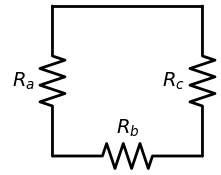

Circuito en Estrella:


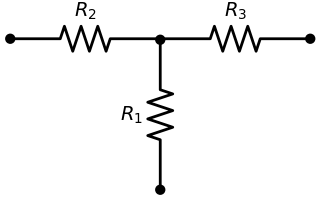

In [29]:
import schemdraw
import schemdraw.elements as elm

def dibujar_delta():
    with schemdraw.Drawing() as d:
        d += elm.Resistor().down().label("$R_a$")
        d += elm.Resistor().right().label("$R_b$")
        d += elm.Resistor().up().label("$R_c$")
        d += elm.Line().left()
        d.draw()

def dibujar_estrella():
    with schemdraw.Drawing() as d:
        d += elm.Dot()
        d += elm.Resistor().down().label("$R_1$")
        d += elm.Resistor().left().at((0, 0.02)).label("$R_2$")
        d += elm.Resistor().right().at((0, 0.02)).label("$R_3$")
        d += elm.Dot().at((3, 0.02))
        d += elm.Dot().at((-3, 0.02))
        d += elm.Dot().at((0, -3))

        d.draw()

print("Circuito en Delta:")
dibujar_delta()
print("Circuito en Estrella:")
dibujar_estrella()

---

## **3. Conversión Estrella a Delta (Y → Δ)**

Para transformar una red **Y** en una **Δ**, usamos las ecuaciones:

$$
R_a = \frac{R_1 R_2 + R_2 R_3 + R_3 R_1}{R_1}
$$

$$
R_b = \frac{R_1 R_2 + R_2 R_3 + R_3 R_1}{R_2}
$$

$$
R_c = \frac{R_1 R_2 + R_2 R_3 + R_3 R_1}{R_3}
$$

Esta transformación se usa cuando queremos expresar un nodo en términos de una conexión en triángulo, lo cual puede facilitar el análisis y la resolución de circuitos eléctricos.


### **Visualización del Circuito en Python**

Circuito en Estrella:


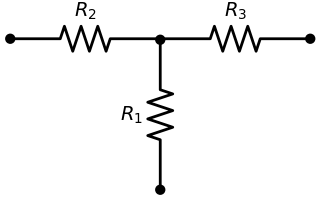

Circuito en Delta:


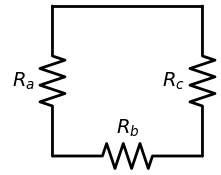

In [18]:
print("Circuito en Estrella:")
dibujar_estrella()
print("Circuito en Delta:")
dibujar_delta()

## **4. Código Interactivo**

Los estudiantes pueden probar sus propios valores de resistencias y realizar las transformaciones automáticamente:


In [4]:
import numpy as np

def delta_a_estrella(Ra, Rb, Rc):
    R1 = (Rb * Rc) / (Ra + Rb + Rc)
    R2 = (Ra * Rc) / (Ra + Rb + Rc)
    R3 = (Ra * Rb) / (Ra + Rb + Rc)
    return R1, R2, R3

def estrella_a_delta(R1, R2, R3):
    Ra = (R1 * R2 + R2 * R3 + R3 * R1) / R1
    Rb = (R1 * R2 + R2 * R3 + R3 * R1) / R2
    Rc = (R1 * R2 + R2 * R3 + R3 * R1) / R3
    return Ra, Rb, Rc

opcion = input("Seleccione la transformación (1: Δ → Y, 2: Y → Δ): ")
if opcion == "1":
    Ra = float(input("Ingrese R_a: "))
    Rb = float(input("Ingrese R_b: "))
    Rc = float(input("Ingrese R_c: "))
    R1, R2, R3 = delta_a_estrella(Ra, Rb, Rc)
    print(f"Resistencias en estrella: R1 = {R1:.2f}Ω, R2 = {R2:.2f}Ω, R3 = {R3:.2f}Ω")
elif opcion == "2":
    R1 = float(input("Ingrese R1: "))
    R2 = float(input("Ingrese R2: "))
    R3 = float(input("Ingrese R3: "))
    Ra, Rb, Rc = estrella_a_delta(R1, R2, R3)
    print(f"Resistencias en delta: Ra = {Ra:.2f}Ω, Rb = {Rb:.2f}Ω, Rc = {Rc:.2f}Ω")
else:
    print("Opción no válida.")

Seleccione la transformación (1: Δ → Y, 2: Y → Δ): 1
Ingrese R_a: 1
Ingrese R_b: 1
Ingrese R_c: 1
Resistencias en estrella: R1 = 0.33Ω, R2 = 0.33Ω, R3 = 0.33Ω
